In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import numpy as np
plt.rcParams['font.sans-serif'] = 'Simhei'
plt.rcParams['axes.unicode_minus'] = False

1. 数据收集与获取

In [2]:
df = pd.read_excel('data/i_nuc.xls')
df.set_index('日期', inplace=True)

df.head(15)

,优盘,电子表,电脑支架,插座,电池,音箱,鼠标,usb数据线,手机充电线,键盘
日期,,,,,,,,,,
2017-01-01,17,6,8,24,13.0,13,18,10,10,27
2017-01-02,11,15,14,13,9.0,10,19,13,14,13
2017-01-03,10,8,12,13,8.0,3,7,11,10,9
2017-01-04,9,6,6,3,10.0,9,9,13,14,13
2017-01-05,4,10,13,8,12.0,10,17,11,13,14
2017-01-06,13,10,13,16,8.0,9,12,11,5,9
2017-01-07,9,7,13,8,5.0,7,10,8,10,7
2017-01-08,9,12,13,6,7.0,8,6,12,11,5
2017-01-12,6,8,8,3,NaN,4,5,5,7,10


2. 数据预处理与清洗

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29 entries, 2017-01-01 to 2017-02-01
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   优盘      29 non-null     int64  
 1   电子表     29 non-null     int64  
 2   电脑支架    29 non-null     int64  
 3   插座      29 non-null     int64  
 4   电池      28 non-null     float64
 5   音箱      29 non-null     int64  
 6   鼠标      29 non-null     int64  
 7   usb数据线  29 non-null     int64  
 8   手机充电线   29 non-null     int64  
 9   键盘      29 non-null     int64  
dtypes: float64(1), int64(9)
memory usage: 2.5 KB


D:\PycharmProjects\venv\Lib\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


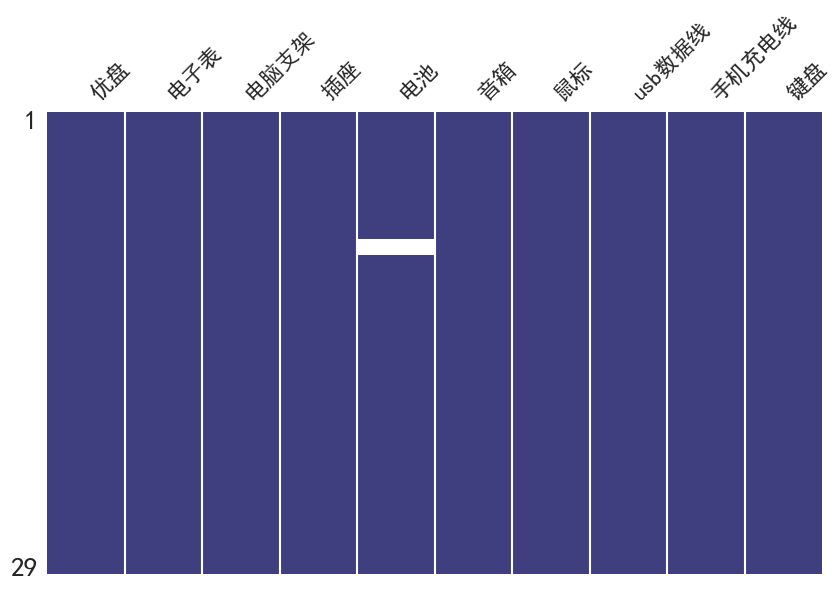

In [4]:
## 通过条形图可视化检查数据中是否有缺失值
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
msno.matrix(df, ax=ax, color=(0.25, 0.25, 0.5))
plt.show()

In [5]:
df = df.fillna(value=df['电池'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29 entries, 2017-01-01 to 2017-02-01
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   优盘      29 non-null     int64  
 1   电子表     29 non-null     int64  
 2   电脑支架    29 non-null     int64  
 3   插座      29 non-null     int64  
 4   电池      29 non-null     float64
 5   音箱      29 non-null     int64  
 6   鼠标      29 non-null     int64  
 7   usb数据线  29 non-null     int64  
 8   手机充电线   29 non-null     int64  
 9   键盘      29 non-null     int64  
dtypes: float64(1), int64(9)
memory usage: 2.5 KB


3. 探索性数据分析（EDA）

In [6]:
# df['销量'] = df.sum(axis=1)
# df

In [7]:
df.columns

Index(['优盘', '电子表', '电脑支架', '插座', '电池', '音箱', '鼠标', 'usb数据线', '手机充电线', '键盘'], dtype='object')

In [8]:
df.describe()

,优盘,电子表,电脑支架,插座,电池,音箱,鼠标,usb数据线,手机充电线,键盘
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,8.172414,8.551724,9.896552,10.206897,8.535714,8.827586,9.862069,9.689655,9.172414,10.517241
std,3.196750,2.720113,3.004102,4.608837,2.556255,3.000821,4.290556,2.941130,2.829298,4.314599
min,3.000000,5.000000,4.000000,3.000000,4.000000,3.000000,1.000000,5.000000,3.000000,4.000000
25%,6.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,9.000000
50%,8.000000,8.000000,11.000000,9.000000,8.000000,9.000000,9.000000,10.000000,10.000000,10.000000
75%,10.000000,10.000000,12.000000,13.000000,10.000000,11.000000,13.000000,12.000000,11.000000,13.000000
max,17.000000,15.000000,14.000000,24.000000,14.000000,15.000000,19.000000,16.000000,14.000000,27.000000


In [9]:
df.median()
# 中位数，电脑支架最高，优盘和电子表最低

优盘         8.0
电子表        8.0
电脑支架      11.0
插座         9.0
电池         8.0
音箱         9.0
鼠标         9.0
usb数据线    10.0
手机充电线     10.0
键盘        10.0
dtype: float64

In [10]:
df.mode()
# 众数，电脑支架最高，电子表最低

,优盘,电子表,电脑支架,插座,电池,音箱,鼠标,usb数据线,手机充电线,键盘
0,9.0,7.0,13.0,9.0,7.0,7,8.0,12.0,10.0,9.0
1,NaN,NaN,NaN,NaN,8.0,8,NaN,NaN,NaN,NaN


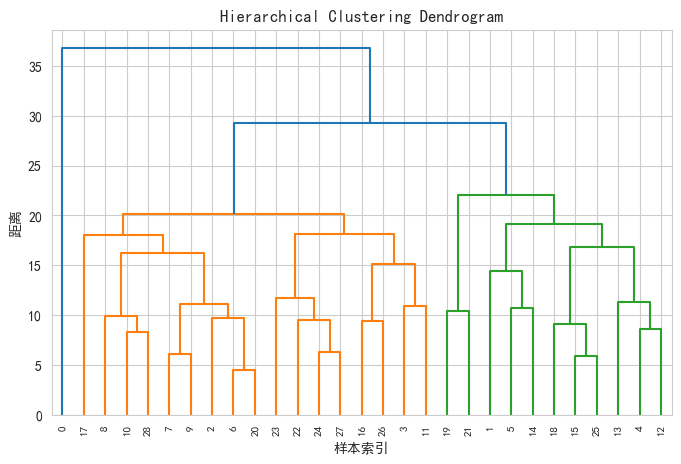

In [11]:
# 层次聚类
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(df, 'ward')  # 使用ward方法进行层次聚类

# 绘制聚类树
plt.figure(figsize=(8, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('样本索引')
plt.ylabel('距离')

# 绘制谱系图
dendrogram(Z, leaf_rotation=90., leaf_font_size=8., )

plt.show()

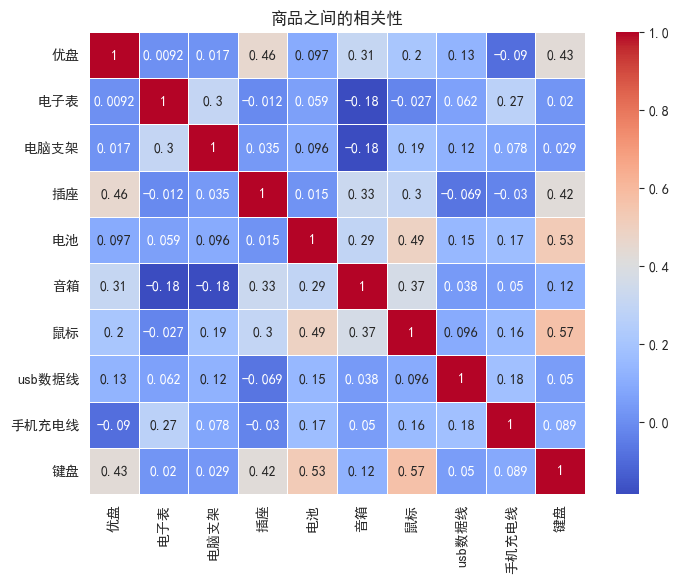

In [12]:
correlation_matrix = df.corr()
# 绘制关联矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('商品之间的相关性')
plt.show()

插座和优盘、鼠标和电池、键盘和优盘、键盘和插座、键盘和电池、键盘和鼠标直接关联性较大，可以把他们挨着摆放，音箱和电子表、音箱和电脑支架关联性成负相关，可以离得远些摆放

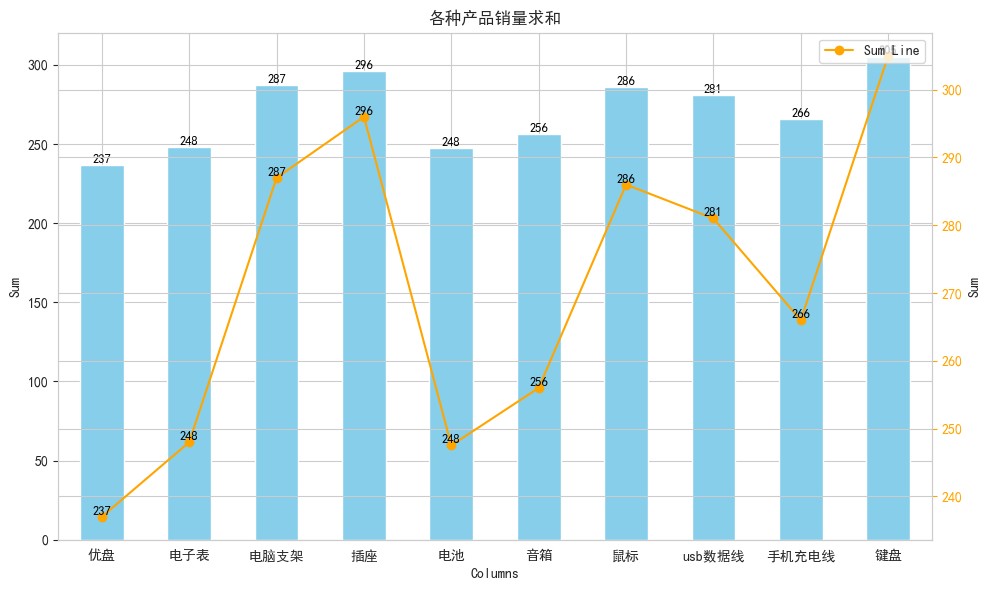

In [13]:
fig, ax1 = plt.subplots(figsize=(10, 6))  # 创建图形和子图
column_sums = df.sum()
columns = column_sums.index  # 列名作为 x 轴标签
bars = column_sums.plot(kind='bar', color='skyblue')  # 绘制条形图
plt.title('各种产品销量求和')  # 设置标题
plt.xlabel('Columns')  # 设置 x 轴标签
plt.ylabel('Sum')  # 设置 y 轴标签
plt.xticks(rotation=0)  # 设置 x 轴刻度标签旋转角度
ax1.tick_params(axis='x', rotation=0)  # 设置 x 轴刻度标签旋转角度

# 添加条形图上的数值标签
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,  # 文本显示的 x 坐标
             bar.get_height(),  # 文本显示的 y 坐标
             f'{bar.get_height():.0f}',  # 格式化显示的文本内容（保留整数）
             ha='center', va='bottom',  # 文本对齐方式
             fontsize=9, color='black')  # 文本字体大小和颜

ax2 = ax1.twinx()  # 创建共享 x 轴的第二个 y 轴
ax2.plot(columns, column_sums, marker='o', linestyle='-', color='orange', label='Sum Line')

ax2.set_ylabel('Sum')  # 设置第二个 y 轴标签
ax2.tick_params(axis='y', colors='orange')  # 设置第二个 y 轴刻度颜色

# 添加折线图的数值标签
for i, val in enumerate(column_sums):
    ax2.text(i, val, f'{val:.0f}', ha='center', va='bottom', fontsize=9, color='black')

# 添加图例
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')
plt.tight_layout()  # 调整布局，防止标签被裁剪
plt.show()  # 显示图形


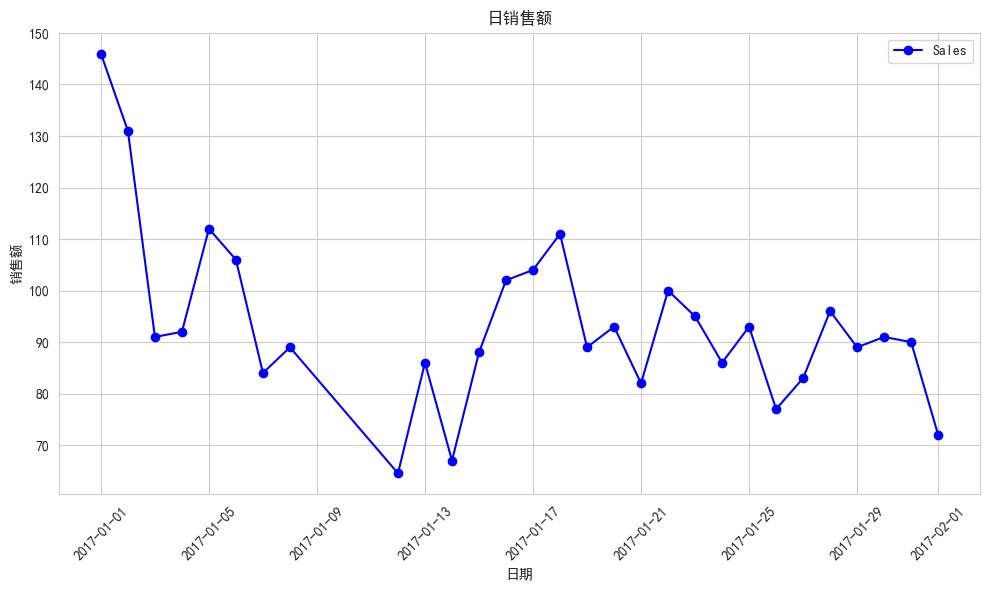

In [14]:
plt.figure(figsize=(10, 6))  # 设置图形大小
plt.plot(df.index, df.sum(axis=1), marker='o', linestyle='-', color='b', label='Sales')  # 绘制折线图
plt.title('日销售额')  # 设置标题
plt.xlabel('日期')  # 设置 x 轴标签
plt.ylabel('销售额')  # 设置 y 轴标签
plt.xticks(rotation=45)  # 设置 x 轴标签旋转角度
plt.grid(True)  # 显示网格线
plt.legend()  # 显示图例
plt.tight_layout()  # 调整布局
plt.show()  # 显示图形


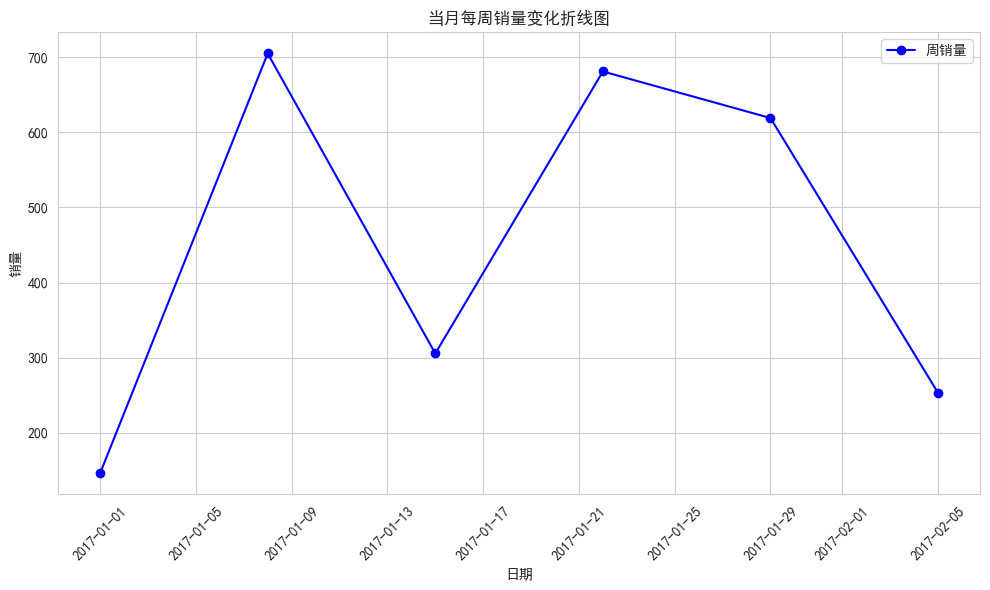

In [15]:
# 按周重新采样并计算每周销量总和
weekly_sales = df.sum(axis=1).resample('W').sum()  # 或者 .mean() 计算平均值
plt.figure(figsize=(10, 6))
plt.plot(weekly_sales.index, weekly_sales.values, marker='o', linestyle='-', color='b', label='周销量')
plt.xlabel('日期')
plt.ylabel('销量')
plt.title('当月每周销量变化折线图')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


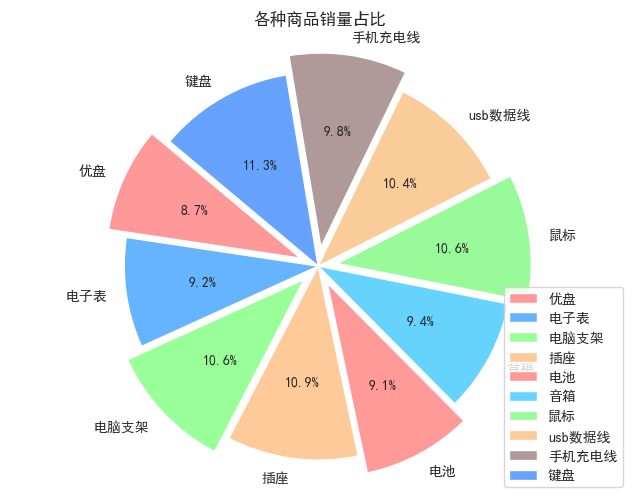

In [16]:
# 设置饼图的参数
plt.figure(figsize=(8, 6))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffca99', '#ff9a99', '#66d3ff', '#99fa99', '#facc99', '#af9999', '#66a3ff']
explode = (0.1, 0, 0.1, 0, 0.1, 0, 0.1, 0, 0.1, 0)  # 突出显示
# 绘制饼图
plt.pie(df.sum(axis=0), labels=df.columns, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
# 添加标题
plt.title('各种商品销量占比')
# 显示图例
plt.legend()
# 显示图形
plt.axis('equal')  # 保证饼图是圆形而不是椭圆形
plt.show()